# Unit 1: Needed Tools

## Contents
1.1 Jupyter

1.2 HDFS

1.3 YARN

1.4 Python: plotting data (optional)

# 1.1 Jupyter

"The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, machine learning and much more." [jupyter.org](http://jupyter.org)

Jupyter has support for a lot of languages, in this course we will focus on Python:
* [Jupyter kernels](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)

To launch a Jupyter notebook:

* Connect to one of the login nodes of the Hadoop Hortonworks Data Platform (HDP) cluster:
    ssh login.hdp.cesga.es

* Launch the Jupyter notebook:
    start_jupyter

* Set a password to protect your notebook

* Open the provided link in the browser


The notebook you have launched is tightly integrated with Spark in order to:
* Automatically opens a pyspark session with the cluster
* Dynamically expands the required executors in the cluster

The console provides useful debugging information, showing Spark messages.

When you finish your interactive work remember to close the notebook properly:
* File -> Close and Halt

## Exercise 1.1.1
Connect to login.hdp.cesga.es and copy the course materials to your home directory:

    cp -r /home/cursos/pyspark_2017 .
    
Start Jupyter and open the Unit 1 notebook.

# 1.2 HDFS

CESGA's Hadoop HDP platform has two main filesystems:
* HOME
* HDFS 

## HOME
The HOME directory is a parallel GlusterFS filesystem shared between all nodes of the cluster.

It works in a similar way to other filesystems using the standard UNIX commands: ls, mkdir, rm, etc. (POSIX-compliant).

It is not intended to be used directly by the Spark applications.
* Store the configurations and common files
* Temporary storage to upload the datasets before moving them to HDFS
* Temporary storage to retrieve the results from HDFS before dowloading them to the local computer

**Keep in mind that it does not have backup.**

## HDFS
The Hadoop Distributed Filesystem (HDFS) is where you store the data that you are going to process with Spark applications.

* Best performance on large files (>100MB)
* Files in HDFS are of type write once
* HDFS is optimized for large sequential reads
* Data is distributed over multiple nodes
* Files are split in blocks: default block size is **128MB**
* Blocks are replicated across multiple nodes: default **3 replicas**

### Architecture
![HDFS Architecture](http://bigdata.cesga.es/tutorials/img/hdfsarchitecture.gif)

### Replication
![HDFS Replicas](http://bigdata.cesga.es/tutorials/img/hdfsreplicas.gif)



## HDFS basic commands

Upload a file from HOME to HDFS:

    hdfs dfs -put local_file.txt remote_file.txt

Download a file from HDFS to HOME:

    hdfs dfs -get remote_file.txt local_file.txt
List files in HDFS:

    hdfs dfs -ls

Lists the files in our HOME directory of HDFS /user/username/

List files in the root directory:

    hdfs dfs -ls /
   
Create a directory:

    hdfs dfs -mkdir testing

Delete a directory:

    hdfs dfs -rm -r -f testing
    
Delete a file:

    hdfs dfs -rm testing/file.txt
    
See the contets of a file:

    hdfs dfs -cat testing/file.txt

For further information check [The HDFS Tutorial](http://bigdata.cesga.es/tutorials/hdfs.html#/)

## Exercise 1.2.1

List the contents of your HDFS home directory

Upload the local datasets stored in:

    /home/cursos/pyspark_2017/datasets

to your home directory in HDFS.

# 1.3 YARN

### YARN Architecture
![YARN Architecture](http://bigdata.cesga.es/tutorials/img/yarn_architecture.gif)

### YARN basic commands
How to see the aggregated logs produced by a job:
    
    yarn logs -applicationId <applicationID> | less

How to see the list of running jobs:
    
    yarn application -list

Kill an application:

    yarn application -kill <applicationID>
    

For further information check [The YARN Tutorial](http://bigdata.cesga.es/tutorials/yarn.html#/)

### Exercise 1.3.1
After starting Jupyter and opening a notebook, verify that there is a YARN application automatically running with your user.

# 1.4 Python: Plotting Data (optional)

## Matplotlib

In [1]:
%matplotlib inline

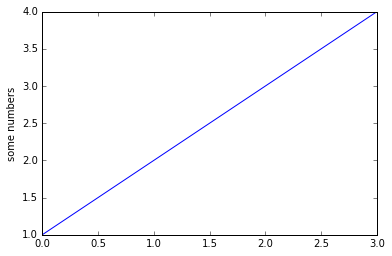

In [2]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

## Bokeh

In [1]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
p = figure(title='Test', x_axis_label='X', y_axis_label='Y')
p.line([1, 2, 3, 4, 5], [3, 2, 1, 3, 4])
show(p)

### Bokeh with Pandas DataFrame

In [3]:
from bokeh.charts import Bar, show
from bokeh.io import output_notebook
from bokeh.charts.attributes import cat
output_notebook()

Loading BokehJS ...

In [4]:
import pandas as pd
df = pd.DataFrame([['Errors', 10], ['Warnings', 1], ['Info', 5]], columns=['Logs', 'Count'])

In [5]:
p = Bar(df, label=cat(columns='Logs', sort=False), values='Count',
        title='Log messages by type',
        legend='top_right')
show(p)

## Exercise 1.4.1

Look into the exercises directory and complete the unit_1_plotting_data.ipynb notebook.